In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [10]:
# Set Seaborn theme
sns.set(style="whitegrid", context="talk")
font_size = 20
dpi = 100

In [11]:
sparsity = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
fp32_acc = [0.9209, 0.9048, 0.8922, 0.9002, 0.8922, 0.8933, 0.8888, 0.8658, 0.8544, 0.8475]
int8_acc = [0.8601, 0.8429, 0.8567, 0.8853, 0.883, 0.8853, 0.8807, 0.8532, 0.8429, 0.8452]
int8_latency = [35556.5, 32841.8, 32888.0, 31714.7, 30061.6, 28419.4, 27443.6, 26198.0, 24778.6, 23334.4]
fp32_size = [417.6, 396.0, 374.4, 352.8, 331.2, 309.6, 287.9, 266.3, 244.7, 223.1]
int8_size = [173.0, 167.5, 162.1, 156.7, 151.3, 145.9, 140.5, 135.0, 129.6, 124.2]

# === Hybrid methods ===
hybrid_methods = ['BERT', 'KD', 'PRUNE', 'LoRa', 'INT8']
hybrid_acc = [0.9209, 0.9083, 0.8922, 0.8911, 0.8865]
hybrid_params = [109.484, 66.96, 55.62, 50.67, 48.08]
hybrid_size = [417.6, 255.4, 212.2, 193.3, 116.7]

# Sparsity-based
df_sparsity = pd.DataFrame({
    'Sparsity': sparsity,
    'FP32 Accuracy': fp32_acc,
    'INT8 Accuracy': int8_acc,
    'INT8 Latency (ms)': int8_latency,
    'FP32 Size (MB)': fp32_size,
    'INT8 Size (MB)': int8_size
})

# Hybrid methods
df_hybrid = pd.DataFrame({
    'Method': hybrid_methods,
    'Accuracy': hybrid_acc,
    'Parameters (M)': hybrid_params,
    'Model Size (MB)': hybrid_size
})

In [12]:
df_sparsity

,Sparsity,FP32 Accuracy,INT8 Accuracy,INT8 Latency (ms),FP32 Size (MB),INT8 Size (MB)
0,0.0,0.9209,0.8601,35556.5,417.6,173.0
1,0.1,0.9048,0.8429,32841.8,396.0,167.5
2,0.2,0.8922,0.8567,32888.0,374.4,162.1
3,0.3,0.9002,0.8853,31714.7,352.8,156.7
4,0.4,0.8922,0.8830,30061.6,331.2,151.3
5,0.5,0.8933,0.8853,28419.4,309.6,145.9
6,0.6,0.8888,0.8807,27443.6,287.9,140.5
7,0.7,0.8658,0.8532,26198.0,266.3,135.0
8,0.8,0.8544,0.8429,24778.6,244.7,129.6
9,0.9,0.8475,0.8452,23334.4,223.1,124.2


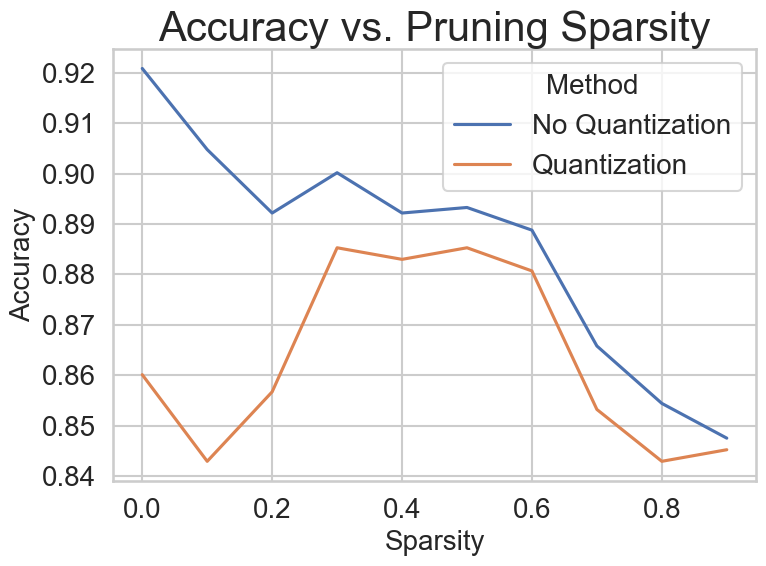

In [13]:
df_sparsity_melted = pd.melt(df_sparsity, ['Sparsity'], value_vars=['FP32 Accuracy', 'INT8 Accuracy'])
label_map = {
    'FP32 Accuracy': 'No Quantization',
    'INT8 Accuracy': 'Quantization'
}
df_sparsity_melted['variable'] = df_sparsity_melted['variable'].map(label_map)

plt.figure(figsize=(8, 6), dpi=dpi)
sns.lineplot(x='Sparsity', y='value', hue='variable',
             data=df_sparsity_melted)
plt.title("Accuracy vs. Pruning Sparsity", fontsize=font_size+10)
plt.ylabel("Accuracy", fontsize=font_size)
plt.xlabel("Sparsity", fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.legend(title="Method", title_fontsize=font_size, fontsize=font_size)
plt.tight_layout()
plt.show()

In [14]:
df_hybrid

,Method,Accuracy,Parameters (M),Model Size (MB)
0,BERT,0.9209,109.484,417.6
1,KD,0.9083,66.960,255.4
2,PRUNE,0.8922,55.620,212.2
3,LoRa,0.8911,50.670,193.3
4,INT8,0.8865,48.080,116.7


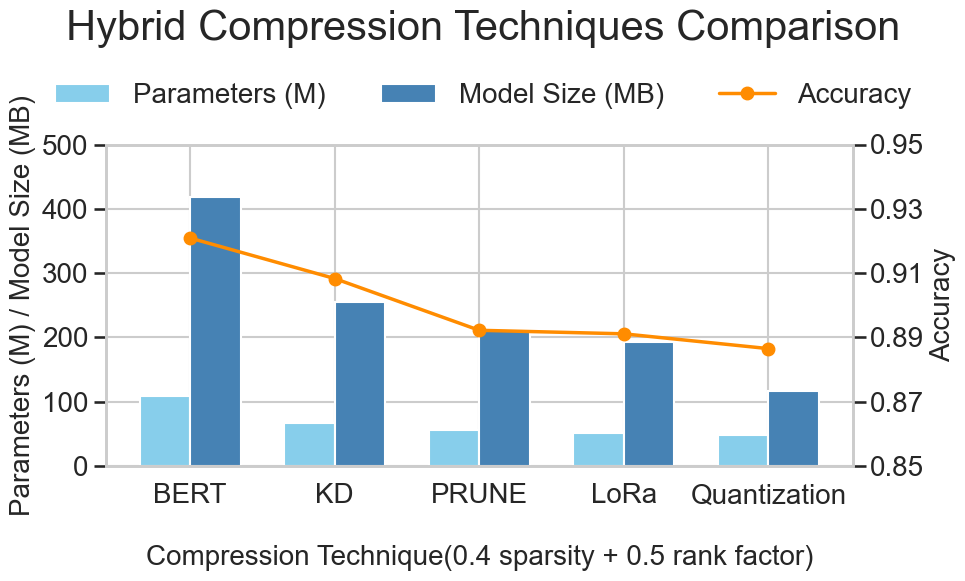

In [19]:
bar_width = 0.35
x = np.arange(len(df_hybrid))

# Plot
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=dpi)

# Bar plots
ax1.bar(x - bar_width/2, df_hybrid['Parameters (M)'], width=bar_width, label='Parameters (M)', color='skyblue')
ax1.bar(x + bar_width/2, df_hybrid['Model Size (MB)'], width=bar_width, label='Model Size (MB)', color='steelblue')

# Left axis labels
ax1.set_xlabel("\nCompression Technique(0.4 sparsity + 0.5 rank factor)", fontsize=font_size)
ax1.set_ylabel("Parameters (M) / Model Size (MB)", fontsize=font_size)
ax1.set_xticks(x)
new_labels = ['BERT', 'KD', 'PRUNE', 'LoRa', 'Quantization']
ax1.set_xticklabels(new_labels, fontsize=font_size)
ax1.tick_params(axis='y', labelsize=font_size)
ax1.set_ylim(0, 280)
ax1.grid(True)

# Right axis for accuracy
ax2 = ax1.twinx()
ax2.plot(x, df_hybrid['Accuracy'], color='darkorange', marker='o', linewidth=2.5, label='Accuracy')
ax2.set_ylabel("Accuracy", fontsize=font_size)
ax2.tick_params(axis='y', labelsize=font_size)
ax2.grid(False)  # Disable gridlines on right axis

# Align gridlines by forcing y-ticks to match
ax1.set_yticks(np.linspace(0, 500, 6))  # Match number of grid lines with default
ax2.set_yticks(np.linspace(0.85, 0.95, 6))

# Gather and combine handles/labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

# Add combined legend
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.9), ncol=3, fontsize=font_size, frameon=False)
# fig.legend(handles, labels, loc='center left', fontsize=font_size, bbox_to_anchor=(1.02, 0.5), frameon=False)
plt.tight_layout()

# Title and layout
fig.suptitle("Hybrid Compression Techniques Comparison\n", fontsize=font_size + 10)
plt.tight_layout()
plt.show()

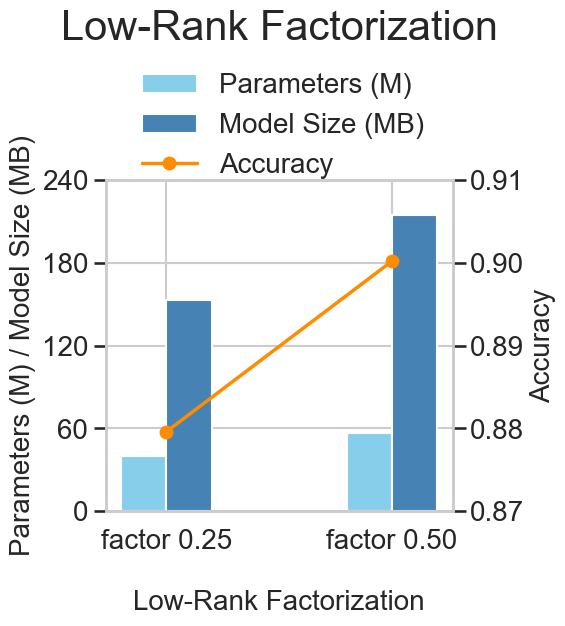

In [16]:
data = {
    'Method': ['factor 0.25', 'factor 0.50'],
    'Accuracy': [0.8796, 0.9002],
    'Params (M)': [40.12, 56.34],
    'Size (MB)': [153.0, 214.9]
}

df_lora = pd.DataFrame(data)

x = np.arange(len(df_lora))
bar_width = 0.2

# Plot setup
fig, ax1 = plt.subplots(figsize=(6, 5), dpi=dpi)

# Bar plots
ax1.bar(x - bar_width/2, df_lora['Params (M)'], bar_width, label='Parameters (M)', color='skyblue')
ax1.bar(x + bar_width/2, df_lora['Size (MB)'], bar_width, label='Model Size (MB)', color='steelblue')
ax1.set_ylabel("Parameters (M) / Model Size (MB)", fontsize=font_size)
ax1.set_xlabel("\nLow-Rank Factorization", fontsize=font_size)
ax1.set_xticks(x)
ax1.set_xticklabels(df_lora['Method'], fontsize=font_size)
ax1.tick_params(axis='y', labelsize=font_size)

# Accuracy line (right y-axis)
ax2 = ax1.twinx()
ax2.plot(x, df_lora['Accuracy'], color='darkorange', marker='o', label='Accuracy', linewidth=2.5)
ax2.set_ylabel("Accuracy", fontsize=font_size)
ax2.set_ylim(0.87, 0.91)
ax2.tick_params(axis='y', labelsize=font_size)
ax2.grid(False)

ax1.set_yticks(np.linspace(0, 240, 5))  # Match number of grid lines with default
ax2.set_yticks(np.linspace(0.87, 0.91, 5))

# Combined legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.19), fontsize=font_size, frameon=False)
# fig.legend(handles, labels, loc='center left', fontsize=font_size, bbox_to_anchor=(1.02, 0.5), frameon=False)
plt.tight_layout()
plt.title("Low-Rank Factorization\n\n\n", fontsize=font_size + 10)
plt.show()